# Word Embeddings: Word2Vec and GloVe

# Word2Vec

In [5]:
import numpy as np
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt

In [6]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
word2vec_model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [8]:
word2vec_model.most_similar('girl')  # gives top 10 most similar words based on cosine similarity

[('boy', 0.8543269634246826),
 ('teenage_girl', 0.7927975654602051),
 ('woman', 0.7494640946388245),
 ('teenager', 0.7172499299049377),
 ('schoolgirl', 0.7075954675674438),
 ('teenaged_girl', 0.6650916337966919),
 ('daughter', 0.6489864587783813),
 ('mother', 0.6478164792060852),
 ('toddler', 0.6473966836929321),
 ('girls', 0.6154742240905762)]

woman - girl + boy

In [9]:
word2vec_model.most_similar(positive=['woman', 'boy'], negative=['girl'], topn=1)

# topn=1 means the #1 most similar word

[('man', 0.862078845500946)]

Paris - France + Spain

In [10]:
word2vec_model.most_similar(positive=['Paris', 'Spain'], negative=['France'], topn=1)

[('Madrid', 0.7571903467178345)]

In [13]:
word2vec_model.most_similar(positive=['Paris', 'Vietnam'], negative=['France'], topn=1)

[('Saigon', 0.6242673993110657)]

C:\Users\rache\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\rache\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


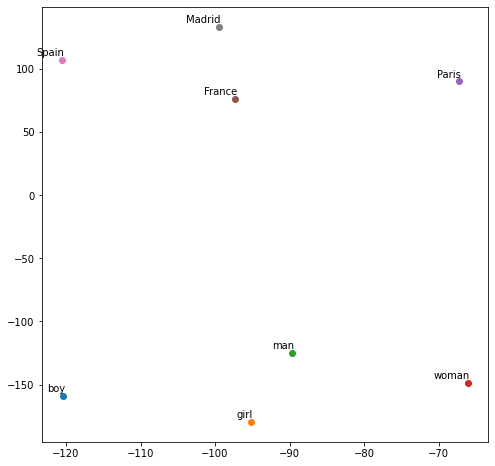

In [11]:
vocab = ["boy", "girl", "man", "woman", "Paris", "France", "Spain", "Madrid"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42) 
    coordinates = tsne_model.fit_transform(wordvecs)                             
    
    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),  
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)

# GloVe

In [12]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

# https://nlp.stanford.edu/projects/glove/

[=================================================-] 98.2% 369.5/376.1MB downloaded

In [56]:
glove_model['man']

array([-0.29784  , -0.13255  , -0.14505  , -0.22752  , -0.027429 ,
        0.11005  , -0.039245 , -0.0089607, -0.18866  , -1.1213   ,
        0.34793  , -0.30056  , -0.50103  , -0.031383 , -0.032185 ,
        0.018318 , -0.090429 , -0.14427  , -0.14306  , -0.057477 ,
       -0.020931 ,  0.56276  , -0.018557 ,  0.15168  , -0.25586  ,
       -0.081564 ,  0.2803   , -0.10585  , -0.16777  ,  0.21814  ,
       -0.11845  ,  0.56475  , -0.12645  , -0.062461 , -0.68043  ,
        0.10507  ,  0.24793  , -0.20249  , -0.30726  ,  0.42815  ,
        0.38378  , -0.19371  , -0.075951 , -0.058287 , -0.067195 ,
        0.2192   ,  0.56116  , -0.28156  , -0.13705  ,  0.45754  ,
       -0.14671  , -0.18562  , -0.074146 ,  0.60737  ,  0.07952  ,
        0.41023  ,  0.18377  , -0.08532  ,  0.43795  , -0.34727  ,
        0.2077   ,  0.50454  ,  0.40244  ,  0.1095   , -0.48078  ,
       -0.22372  , -0.54619  , -0.20782  ,  0.13751  , -0.16206  ,
       -0.24835  ,  0.17124  ,  0.037355 ,  0.14547  , -0.0562

In [57]:
glove_model.most_similar('girl')

[('boy', 0.8272891044616699),
 ('woman', 0.729641854763031),
 ('girls', 0.7227292060852051),
 ('teenager', 0.650977373123169),
 ('teenage', 0.6492719054222107),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.6125240921974182),
 ('daughter', 0.6050207614898682)]

In [58]:
# woman - girl + boy 

glove_model.most_similar(positive=['woman', 'boy'], negative=['girl'], topn=1)

[('man', 0.7805180549621582)]

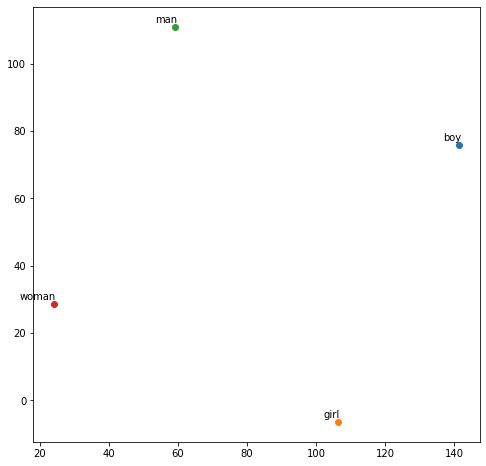

In [61]:
vocab = ["boy", "girl", "man", "woman"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)